#  Introduction:
The business landscape is continuously evolving, with companies facing heightened competition, shifting consumer preferences, and varying performance metrics. To better understand the underlying dynamics that contribute to success, clustering companies based on their characteristics and ratings offers valuable insights. By employing unsupervised learning techniques, such as clustering, patterns in company performance, customer satisfaction, and industry trends can be identified. This analysis will not only help in benchmarking companies but also in understanding the factors that influence a company's market position.

In this study, we utilize a dataset of 9,000 companies, focusing on their ratings and characteristics, to perform clustering. The goal is to group these companies into clusters based on their performance metrics, allowing us to explore similarities, differences, and key insights across various sectors. Tools such as Scikit-learn, Pandas, Numpy, and Matplotlib will be leveraged to preprocess the data, build models, and visualize the results

# Step 1: Import The key Libraries

In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/company-clustering/company_dataset.csv


In [89]:
# loading necessary libraries
from matplotlib import pyplot
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

In [90]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/colab/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Step 2: Read the DataSet

In [92]:
companydf = pd.read_csv('/kaggle/input/company-clustering/company_dataset.csv')
print("Full train dataset shape is {}".format(companydf.shape))

Full train dataset shape is (9056, 8)


# Step 3. Basic Data View / Exploration

In [93]:
companydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9056 entries, 0 to 9055
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    9056 non-null   int64  
 1   name          9056 non-null   object 
 2   ratings       9056 non-null   float64
 3   review_count  9056 non-null   object 
 4   ctype         9046 non-null   object 
 5   years         8542 non-null   object 
 6   hq            8887 non-null   object 
 7   employees     7466 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 566.1+ KB


# observation

- here we could understand missing values exists in this dataset

In [94]:
companydf.head()

,Unnamed: 0,name,ratings,review_count,ctype,years,hq,employees
0,0,TCS,3.8,(59.9k Reviews),Public,55 years old,"Mumbai,Maharashtra + 276 more",1 Lakh+ Employees (India)
1,1,Accenture,4.1,(38.3k Reviews),Public,34 years old,Dublin + 139 more,1 Lakh+ Employees (India)
2,2,Cognizant,3.9,(34.9k Reviews),Private,29 years old,Teaneck. New Jersey. + 109 more,1 Lakh+ Employees (India)
3,3,ICICI Bank,4.0,(28.5k Reviews),Public,29 years old,"Mumbai,Maharashtra + 1159 more",1 Lakh+ Employees (India)
4,4,Wipro,3.9,(28.4k Reviews),Public,78 years old,"Bangalore/Bengaluru,Karnataka + 235 more",1 Lakh+ Employees (India)


In [95]:
companydf.dtypes

Unnamed: 0        int64
name             object
ratings         float64
review_count     object
ctype            object
years            object
hq               object
employees        object
dtype: object

In [96]:
companydf.sample(10)

,Unnamed: 0,name,ratings,review_count,ctype,years,hq,employees
6837,6838,Yeshshree Press ...,3.7,(90 Reviews),"Aurangabad,Maharashtra + 1 more",1k-5k Employees (India),26 years old,NaN
4819,4820,Chandigarh Group...,3.6,(128 Reviews),Private,22 years old,Mohali + 9 more,501-1k Employees (India)
357,358,Barclays,4.1,(1.4k Reviews),Private,333 years old,London + 23 more,10k-50k Employees (India)
175,176,American Express,4.3,(2.3k Reviews),Private,173 years old,"New York City,New York + 36 more",10k-50k Employees (India)
4604,4605,Prakash Industri...,4.0,(135 Reviews),Public,43 years old,New Delhi + 29 more,501-1k Employees (India)
6870,6871,Tyco Fire & Secu...,4.3,(89 Reviews),Private,31 years old,Abu Dhabi + 16 more,501-1k Employees (India)
7351,7352,Ms Agarwal Found...,3.8,(83 Reviews),Secunderabad + 4 more,51-200 Employees (India),33 years old,NaN
2938,2939,BharatPe,3.7,(208 Reviews),Private,5 years old,"Bangalore,Karnataka + 51 more",201-500 Employees (India)
1995,1996,Indium Software,3.9,(300 Reviews),Private,24 years old,"Chennai,Tamil Nadu + 6 more",1k-5k Employees (India)
1889,1890,First Flight Cou...,4.1,(315 Reviews),Private,35 years old,"Mumbai,Maharashtra + 71 more",1k-5k Employees (India)


In [97]:
print("\n Dataset.columns")
print(companydf.columns)


 Dataset.columns
Index(['Unnamed: 0', 'name', 'ratings', 'review_count', 'ctype', 'years', 'hq',
       'employees'],
      dtype='object')


In [98]:
companydf.isnull().sum()

Unnamed: 0         0
name               0
ratings            0
review_count       0
ctype             10
years            514
hq               169
employees       1590
dtype: int64

- Here missing values exists in :
1. ctype             10
2. years            514
3. hq               169
4. employees       1590

In [99]:
# Find the percentage of missing values 
companydf.isnull().sum()/companydf.shape[0]*100

Unnamed: 0       0.000000
name             0.000000
ratings          0.000000
review_count     0.000000
ctype            0.110424
years            5.675795
hq               1.866166
employees       17.557420
dtype: float64

In [100]:
companydf.duplicated().sum()

0

In [101]:
for c in companydf.columns:
    print(c, companydf[c].unique()[:3])

Unnamed: 0 [0 1 2]
name ['TCS' 'Accenture' 'Cognizant']
ratings [3.8 4.1 3.9]
review_count ['(59.9k Reviews)' '(38.3k Reviews)' '(34.9k Reviews)']
ctype ['Public' 'Private' 'Partnership']
years ['55 years old' '34 years old' '29 years old']
hq ['Mumbai,Maharashtra + 276 more' 'Dublin + 139 more'
 'Teaneck. New Jersey. + 109 more']
employees ['1 Lakh+ Employees (India)' '50k-1 Lakh Employees (India)'
 '10k-50k Employees (India)']


# step 4: Data preprocessing - clean

- missing value handling is required
- drop un wanted

# Drop unwanted

In [102]:
companydf = companydf.drop(["Unnamed: 0"], axis = 1)

In [103]:
# Review the top rows of what is left of the data frame
companydf.head()

,name,ratings,review_count,ctype,years,hq,employees
0,TCS,3.8,(59.9k Reviews),Public,55 years old,"Mumbai,Maharashtra + 276 more",1 Lakh+ Employees (India)
1,Accenture,4.1,(38.3k Reviews),Public,34 years old,Dublin + 139 more,1 Lakh+ Employees (India)
2,Cognizant,3.9,(34.9k Reviews),Private,29 years old,Teaneck. New Jersey. + 109 more,1 Lakh+ Employees (India)
3,ICICI Bank,4.0,(28.5k Reviews),Public,29 years old,"Mumbai,Maharashtra + 1159 more",1 Lakh+ Employees (India)
4,Wipro,3.9,(28.4k Reviews),Public,78 years old,"Bangalore/Bengaluru,Karnataka + 235 more",1 Lakh+ Employees (India)


# Filling missing values

In [104]:
companydf.ctype.fillna("Unknown", inplace=True)
companydf.years.fillna("Unknown", inplace=True)
companydf.hq.fillna("Unknown", inplace=True)
companydf.employees.fillna("Unknown", inplace=True)


In [105]:
companydf.isnull().sum()

name            0
ratings         0
review_count    0
ctype           0
years           0
hq              0
employees       0
dtype: int64

# observation
- 1 Find the Descriptive Statistics:
- 2 Calculate mean, median, and standard deviation of severity levels.

In [106]:
print("\nDataset Descriptive Statistics:")
print(companydf.describe())


Dataset Descriptive Statistics:
           ratings
count  9056.000000
mean      3.897394
std       0.377954
min       1.200000
25%       3.700000
50%       3.900000
75%       4.100000
max       5.000000


# Step 5: EDA (Explorative Data Analytics)
- Conduct exploratory data analysis (EDA) to understand the dataset’s structure and identify key patterns and correlations.

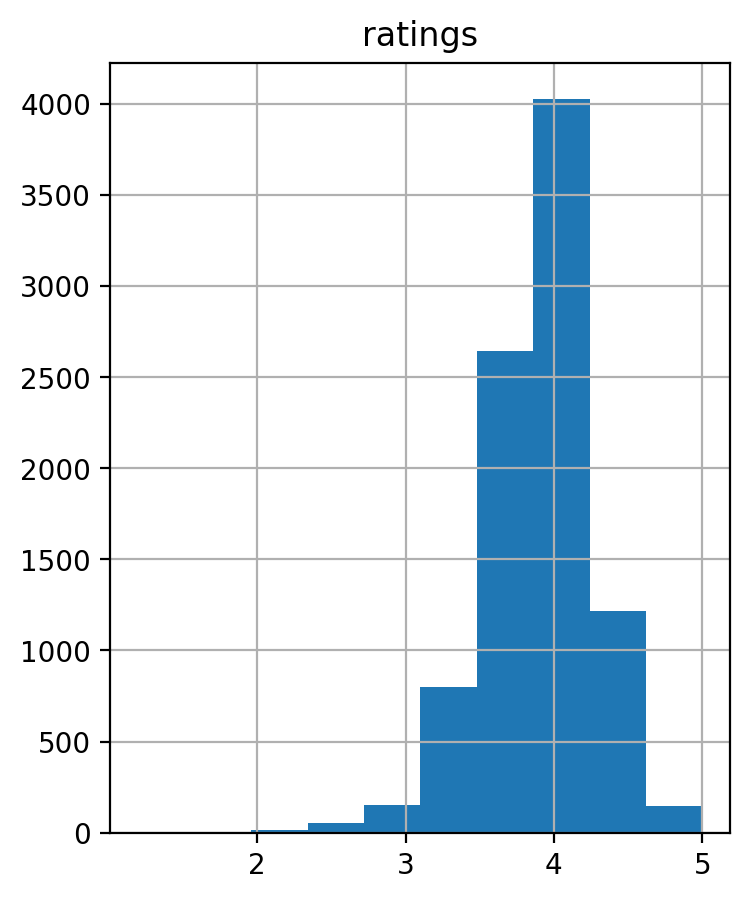

In [107]:
companydf.hist(layout=(1,6), figsize=(30,5))
plt.show()

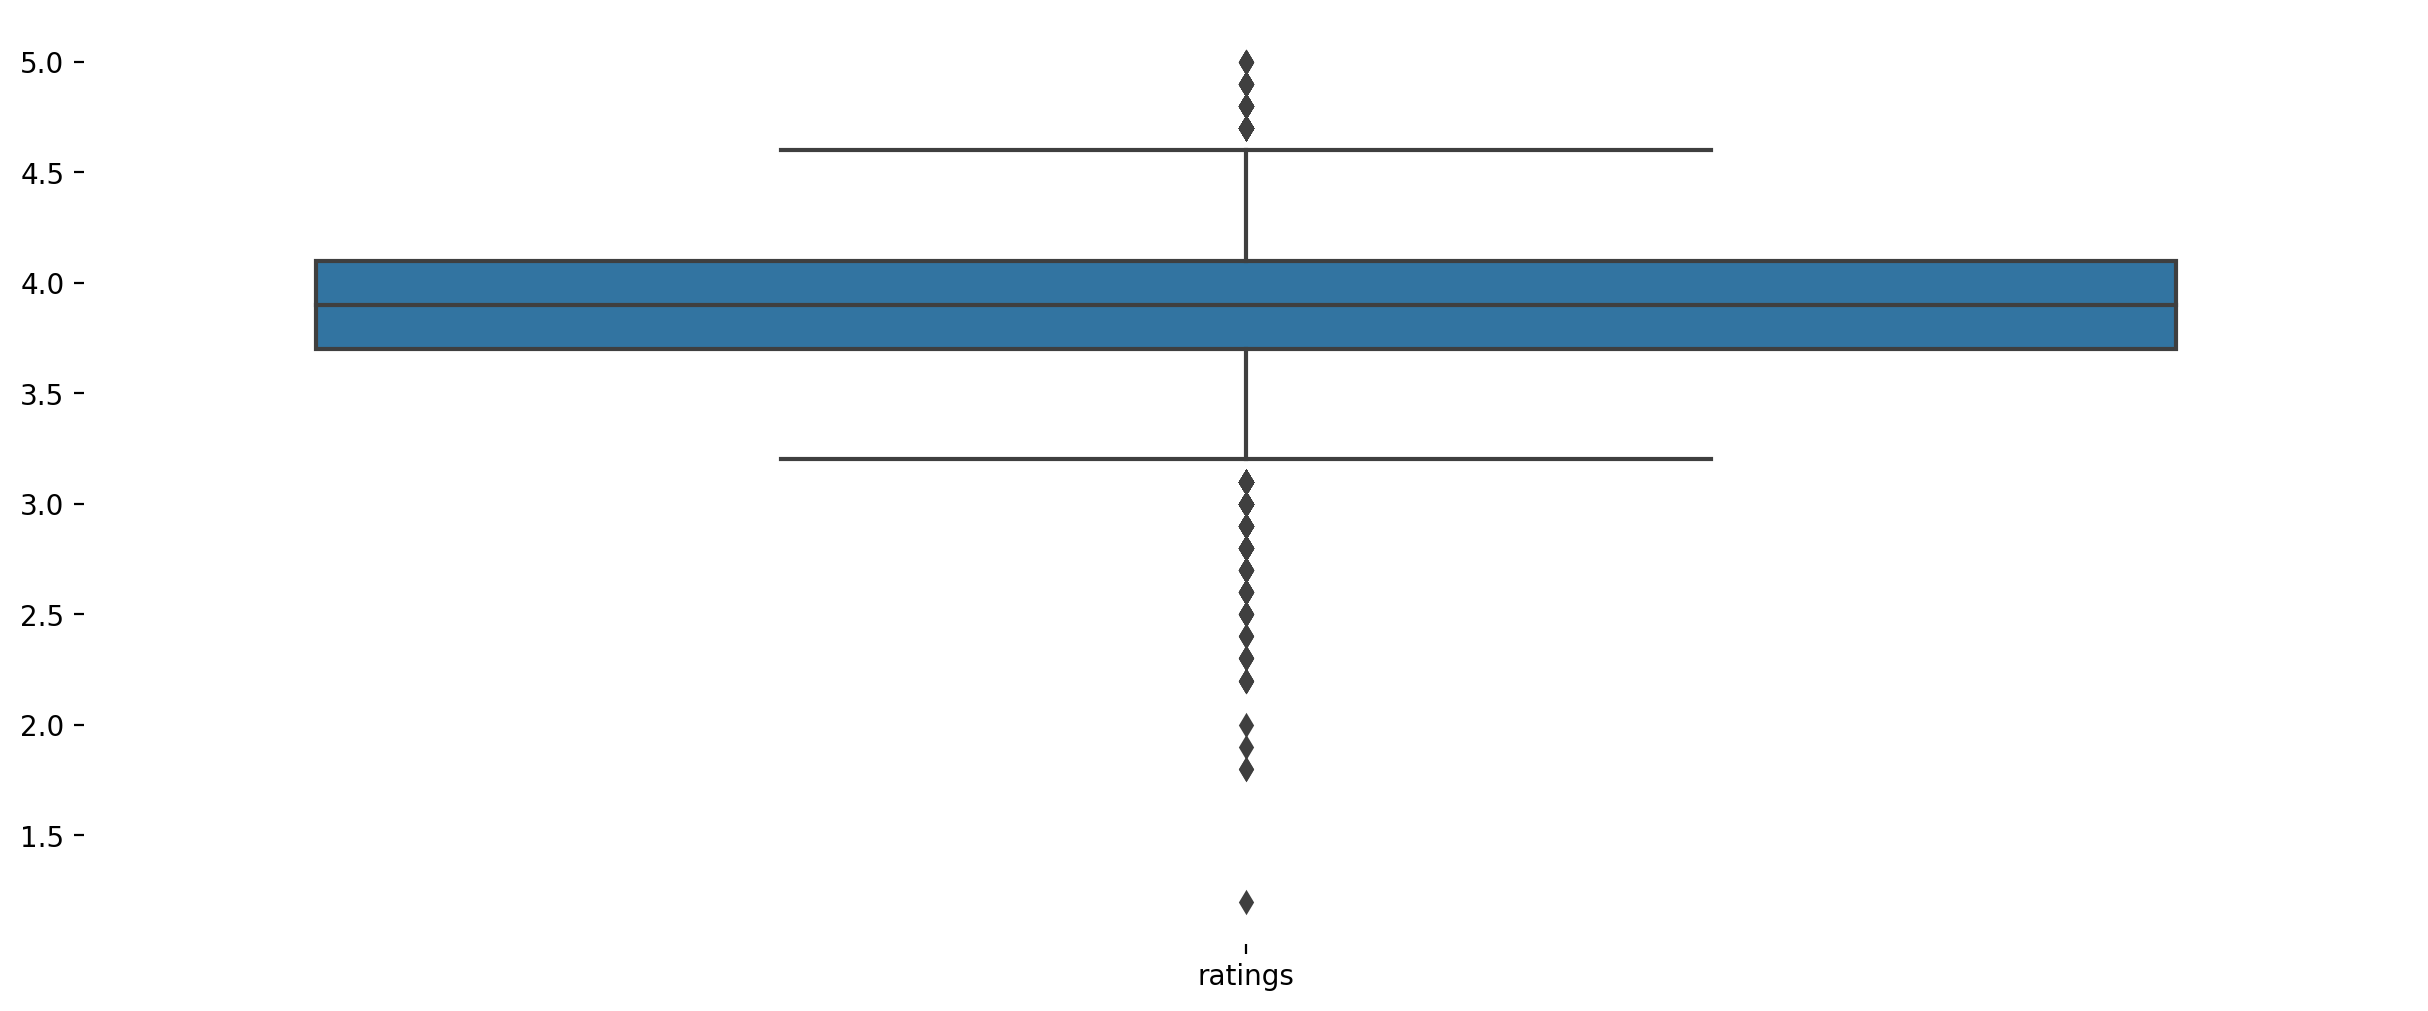

In [108]:
# Define your color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Example colors

plt.figure(figsize=(15,6))
sns.boxplot(data=companydf, palette=colors )
sns.despine(left=True, bottom=True)
plt.show()

# Data Visualization

In [109]:
import plotly.express as px
import plotly.graph_objs as go

In [110]:
ratings_count = companydf['ratings'].value_counts()
# pie chart
fig = px.pie(values=ratings_count, names=ratings_count.index)

# Enhance the plot by adding a title and labels
fig.update_layout(title="company ratings")

# Display the plot
fig.show()

In [111]:
# Create a box plot 
name_ratings_boxplot = px.box(companydf, x='ratings', y='name', color='ratings', title='Distribution of Ratings by Name')

# Display the plot
name_ratings_boxplot.show()

In [112]:
# Create a histogram of the 'years' column, and include the Violin plot to show the distribution
fig = px.histogram(companydf, x='years', marginal='violin')

# Display the plot
fig.show()

In [113]:
# Create a histogram of the 'employees' column, and include the Violin plot to show the distribution
fig = px.histogram(companydf, x='employees', marginal='violin')

# Display the plot
fig.show()

# Data Preprocessing

- Now that we have a good understanding of how the data is distributed and what insights it represents, we can move on to the crucial step of data preprocessing. This step involves cleaning and transforming the data to prepare it for analysis.

In [114]:
from sklearn.preprocessing import LabelEncoder

In [115]:
# define the categorical columns.
categorical_columns = ['name', 'ctype', 'years', 'hq', 'employees']

# define the remarkable columns.
numerical_columns = ['ratings', 'review_count']

In [116]:
# Convert or categorical columns to numerical columns.
for cat_col in categorical_columns:
    
    # Initialise label encoder.
    encoder = LabelEncoder()
    
    # Apply transformation.
    companydf[cat_col] = encoder.fit_transform(companydf[cat_col])

In [117]:
companydf.head()

,name,ratings,review_count,ctype,years,hq,employees
0,7101,3.8,(59.9k Reviews),860,179,2834,1
1,201,4.1,(38.3k Reviews),860,146,1371,1
2,1575,3.9,(34.9k Reviews),858,137,3954,1
3,3264,4.0,(28.5k Reviews),860,137,2760,1
4,8052,3.9,(28.4k Reviews),860,206,499,1


- It is recommended to perform feature scaling on the dataset to bring all the feature columns to a standard range. This is because the current range of each feature column is different from the other feature columns, which can have a significant impact on the model's performance. To achieve this, the standard scaler can be used, which is a popular method for scaling numerical data

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [120]:
# one_hot_encoded_training_predictors = pd.get_dummies(companydf)

In [121]:
# Initialise standard scalar.
scaler = StandardScaler()

In [122]:
companydf[:5]

,name,ratings,review_count,ctype,years,hq,employees
0,7101,3.8,(59.9k Reviews),860,179,2834,1
1,201,4.1,(38.3k Reviews),860,146,1371,1
2,1575,3.9,(34.9k Reviews),858,137,3954,1
3,3264,4.0,(28.5k Reviews),860,137,2760,1
4,8052,3.9,(28.4k Reviews),860,206,499,1


# Data Correlation

In [123]:
import pandas as pd

# Display the types of each column
print(companydf.dtypes)

# Identify non-numeric columns
non_numeric_cols = companydf.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

# Convert the relevant columns to numeric if applicable
for col in non_numeric_cols:
    # Example: Extracting numbers from strings (e.g., '(59.9k Reviews)')
    companydf[col] = companydf[col].str.extract('(\d+\.?\d*)')[0]  # Adjust regex as needed
    companydf[col] = pd.to_numeric(companydf[col], errors='coerce')  # Convert to numeric

# Now you can calculate the correlation matrix
corr = companydf.corr()


name              int64
ratings         float64
review_count     object
ctype             int64
years             int64
hq                int64
employees         int64
dtype: object
Non-numeric columns: Index(['review_count'], dtype='object')


In [124]:
# import go
import pandas as pd
import plotly.graph_objects as go

In [125]:
# Calculate correlation
corr = companydf.corr()

# Create the correlation matrix heatmap
fig = go.Figure(data=go.Heatmap(
                   z=corr.values,
                   x=corr.columns,
                   y=corr.columns,
                   colorscale='Viridis',
                   colorbar=dict(title='Correlation')))

# Update heatmap layout
fig.update_layout(title='Correlation Matrix Heatmap',
                  xaxis=dict(side='top'))

# Show the figure
fig.show()

In [126]:
from sklearn.decomposition import PCA

In [127]:
# Instantiate a PCA object with 2 components for 2D data
pca_2D = PCA(n_components=2, random_state=42)

# Fit and transform the data to obtain the 2D projection
data_2D = pca_2D.fit_transform(companydf)


# Instantiate a PCA object with 3 components for 3D data
pca_3D = PCA(n_components=3, random_state=42)

# Fit and transform the data to obtain the 3D projection
data_3D = pca_3D.fit_transform(companydf)

# K-Means Clustering

- K-means clustering is a popular unsupervised machine learning algorithm that aims to group similar data points together in a dataset. The algorithm takes in a dataset and the desired number of clusters (k), then it randomly selects k data points to serve as the initial centroids for the clusters. It then assigns each data point in the dataset to the nearest centroid, creating k clusters.

Next, the algorithm computes the mean (center) of each cluster and moves the centroid to this new location. It then re-assigns each data point to the nearest centroid again, and repeats the process of computing new cluster means and re-assigning data points until the centroids no longer move or a maximum number of iterations is reached.

The output of the K-means algorithm is the final centroids and the assignment of each data point to its corresponding cluster. The goal of the algorithm is to minimize the sum of squared distances between each data point and its assigned centroid, known as the Within-Cluster Sum of Squares (WCSS).

In [128]:
from sklearn.cluster import KMeans

In [129]:
# create a list to store the sum of squared distances for each k
ssd = []

# fit KMeans clustering with different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(companydf)
    ssd.append(kmeans.inertia_)

# create a dataframe with the k values and corresponding ssd
df = pd.DataFrame({'k': range(1, 11), 'ssd': ssd})

# create the line plot using Plotly Express
fig = px.line(df, x='k', y='ssd', title='Elbow Method')
fig.update_traces(mode='markers+lines', marker=dict(size=8))
fig.show()

# Elbow Method

- The Elbow method is a heuristic used to determine the optimal number of clusters to use in a K-means clustering algorithm. The method involves plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use. The explained variation is defined as the Sum of Squared Distances between the data points and their assigned cluster centers, also known as the Within-Cluster Sum of Squares (WCSS).

The intuition behind the Elbow method is that as the number of clusters increases, the WCSS will generally decrease because each data point will be closer to its assigned cluster center. However, beyond a certain point, the marginal gain in WCSS reduction will start to diminish, resulting in a flattening of the curve. This point of flattening is referred to as the "elbow," and it represents the optimal number of clusters to use

In [130]:
from sklearn.metrics import silhouette_score

In [131]:
# create a list to store the silhouette scores for each k
silhouette_scores = []

# fit KMeans clustering with different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(companydf)
    silhouette_avg = silhouette_score(companydf, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# find the k with the highest silhouette score
best_k = np.argmax(silhouette_scores) + 2

# plot the silhouette scores vs k
fig = px.line(x=range(2, 11), y=silhouette_scores, title='Silhouette Method')
fig.update_layout(xaxis_title='Number of Clusters (k)', yaxis_title='Silhouette Score')
fig.add_vline(x=best_k, line_dash='dash', line_color='red', annotation_text=f'Best k: {best_k}')
fig.show()

# Silhouette Method

In [132]:
from sklearn.metrics import calinski_harabasz_score

In [133]:
# create a list to store the Calinski-Harabasz scores for each k
scores = []

# fit KMeans clustering with different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(companydf)
    score = calinski_harabasz_score(companydf, kmeans.labels_)
    scores.append(score)

# create a dataframe with the k values and corresponding scores
df = pd.DataFrame({'No. of clusters(k)': range(2, 11), 'Calinski-Harabasz Score': scores})

# create the line plot using Plotly Express
fig = px.line(df, x='No. of clusters(k)', y='Calinski-Harabasz Score', title='Calinski-Harabasz Index')
fig.update_traces(mode='markers+lines', marker=dict(size=8))
fig.show()


# Calinski-Harabasz Index

In [134]:
# KMeans Clustering 
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the KMeans model on train_ds
kmeans.fit(companydf)

# Obtain cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [135]:
# Create the 3D scatter plot
fig = px.scatter_3d(
    x=data_3D[:, 0], y=data_3D[:, 1], z=data_3D[:, 2], 
    color=labels,
    size_max=5, 
    opacity=0.8,
    labels={'x':'X', 'y':'Y', 'z':'Z'},
    color_continuous_scale=['black', 'cyan'])

# Add a trace for the cluster centers
fig.add_trace(
    go.Scatter3d(
        x=centroids[:,0],
        y=centroids[:,1],
        z=centroids[:,2],
        mode='markers+text',
        text=['Centroid 1', 'Centroid 2'],
        marker=dict(
            size=10,
            color='orange',
            opacity=0.8,
            symbol='diamond'
        )
    )
)

# Update the layout
fig.update_layout(
    coloraxis_showscale=False,
    title='K Means Clustering Visualization'
)

# Show the plot
fig.show()


In [136]:
# Create the 2D scatter plot
fig = px.scatter(
    x=data_2D[:, 0], y=data_2D[:, 1],
    color=labels,
    size_max=5, 
    opacity=0.7,
    labels={'x':'X', 'y':'Y'},
    color_continuous_scale=['black', 'cyan'])

# Add a trace for the cluster centers
fig.add_trace(
    go.Scatter(
        x=centroids[:,0],
        y=centroids[:,1],
        mode='markers+text',
        text=['Centroid 1', 'Centroid 2'],
        marker=dict(
            size=20,
            color='orange',
            opacity=1.0,
            symbol='diamond'
        )
    )
)

# Update the layout
fig.update_layout(
    coloraxis_showscale=False,
    title='K Means Clustering Visualization'
)

# Show the plot
fig.show()


# DBSCAN

- DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are close to each other based on a density criterion. It is particularly useful for discovering clusters of arbitrary shape in datasets that contain noise or outliers.

In [137]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
model = DBSCAN(eps=0.7, min_samples=5)
model.fit(companydf)

# Obtail labels
labels = model.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)          # -1 stands for noise in the data i.e. outliers

# Create the 3D scatter plot
fig = px.scatter_3d(
    x=data_3D[:, 0], y=data_3D[:, 1], z=data_3D[:, 2], 
    color=labels,
    color_discrete_sequence=px.colors.qualitative.Alphabet,
    size_max=5, 
    opacity=0.8,
    labels={'x':'X', 'y':'Y', 'z':'Z'},
    title=f'DBSCAN Clustering({n_clusters} Clusters)')

# Show the plot
fig.show()

In [138]:
# Define the labels and their corresponding opacity values
label_opacity = {
    0: 1.0,        # opacity for label 0
    1: 1.0,        # opacity for label 1
    2: 1.0,        # opacity for label 2
    -1: 0.3        # opacity for label -1
}

# Create separate traces for each label with the corresponding opacity values
traces = []
for label in set(labels):
    opacity = label_opacity[label]
    mask = labels == label
    trace = go.Scatter(
        x=data_2D[mask, 0], y=data_2D[mask, 1],
        mode='markers',
        marker=dict(
            size=5*(opacity*5),
            opacity=opacity
        ),
        name=f'Label {label}'
    )
    traces.append(trace)

# Create the plot
fig = go.Figure(data=traces, layout=go.Layout(
    title='DBSCAN Clustering',
    xaxis_title='X',
    yaxis_title='Y'
))

# Show the plot
fig.show()


# Conclusion:
Through clustering analysis of the 9,000 companies, we have successfully identified distinct groups of companies that share common characteristics and performance metrics. The patterns observed in customer satisfaction, industry trends, and overall ratings provide actionable insights for companies aiming to enhance their market positioning and operational efficiency. This clustering approach offers a foundation for deeper exploration into the drivers of success and failure across industries. Moreover, it equips businesses with the tools to identify potential benchmarks, areas for improvement, and opportunities for strategic growth within their respective clusters.